In [199]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

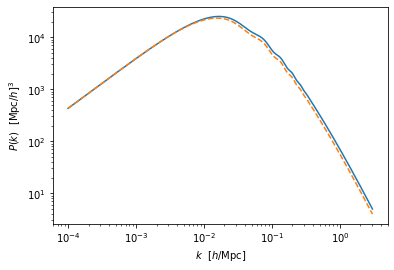

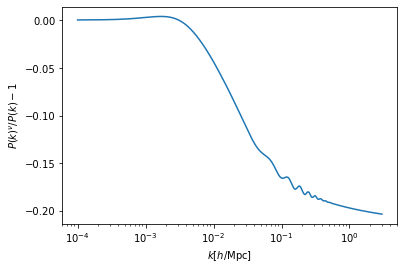

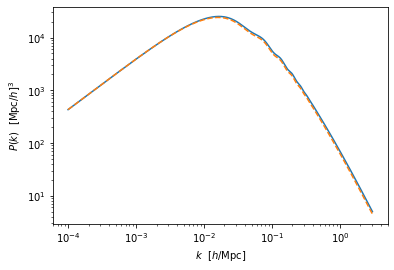

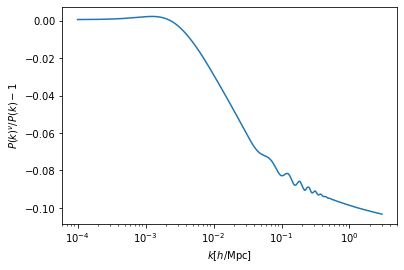

In [216]:
LambdaCDM_settings = {'omega_b':0.0223828,
                     #'omega_cdm':0.1201075,
                     'h':0.67810,
                     'A_s':2.100549e-09,
                     'n_s':0.9660499,
                     'tau_reio':0.05430842,
                     'output':'mPk',
                     'P_k_max_1/Mpc':3.0,
                      'Omega_m':0.309883043,
                     # The next line should be uncommented for higher precision (but significantly slower running)
                     'ncdm_fluid_approximation':3,
                     # You may uncomment this line to get more info on the ncdm sector from Class:
                     'background_verbose':1
                    }


LambdaCDM = Class()
LambdaCDM.set(LambdaCDM_settings)
LambdaCDM.compute()

kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk_LambdaCDM = np.zeros(len(kk)) # P(k) in (Mpc/h)**3
h = LambdaCDM_settings['h'] # get reduced Hubble for conversions to 1/Mpc
for i,k in enumerate(kk):
        Pk_LambdaCDM[i] = LambdaCDM.pk(k*h,0.)*h**3 # function .pk(k,z)


def neutrino_func1(mass,filename):
    
    
    neutrino_mass_settings = {'N_ur':0.00441,
                          'N_ncdm':3,
                          'm_ncdm' : '{},{},{}'.format(mass,mass,mass)
                             }
    neutrino = Class()
    neutrino.set(LambdaCDM_settings)
    neutrino.set(neutrino_mass_settings)
    neutrino.compute()
    
    
    kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
    Pk_neutrino = np.zeros(len(kk))
    
    for i,k in enumerate(kk):
        Pk_neutrino[i] = neutrino.pk(k*h,0.)*h**3 # function .pk(k,z)
    
    np.savez(filename, m_ncdm = mass)
    
    plt.figure()
    plt.loglog(kk,Pk_LambdaCDM)
    plt.loglog(kk,Pk_neutrino,linestyle='--')
    plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
    plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
    plt.show()
    
    plt.figure()
    plt.semilogx(kk,Pk_neutrino/Pk_LambdaCDM-1)
    plt.xlabel(r'$k [h /\mathrm{Mpc}]$')
    plt.ylabel(r'$P(k)^\nu/P(k)-1$')
    plt.show()
    
neutrino_func1(0.1,"page_3_instruc1")
neutrino_func1(0.05,"page_3_instruc2")

In [237]:
mass1 = np.load("page_3_instruc1.npz")
print(mass1['m_ncdm'])

0.1


In [238]:
mass2 = np.load("page_3_instruc2.npz")
print(mass2['m_ncdm'])

0.05


In [239]:
data = np.load("lambda_model.npz")


K_array1 = data['k1']
L_array = data['Pk_L']

In [240]:
data = np.load("neutrino_model.npz")


K_array2 = data['k2']
neu_array = data['Pk_n']

In [241]:
data = np.load("n_new_model.npz")

K_array3 = data['k3']
new_n_array = data['Pk_new']

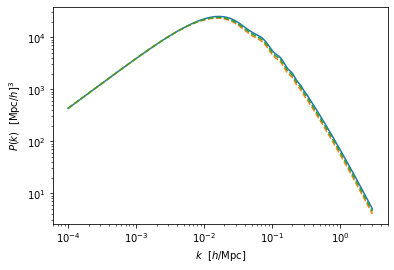

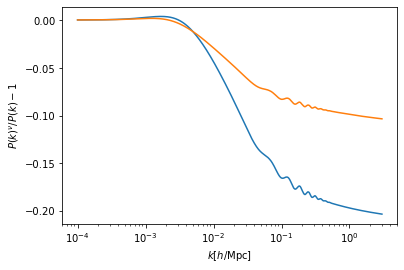

In [242]:
plt.figure()
plt.loglog(K_array1,L_array)
plt.loglog(K_array2,neu_array,linestyle='--')
plt.loglog(K_array3,new_n_array,linestyle='--')
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.show()
    
plt.figure()
plt.semilogx(K_array1,neu_array/L_array-1)
plt.semilogx(K_array1,new_n_array/L_array-1)
plt.xlabel(r'$k [h /\mathrm{Mpc}]$')
plt.ylabel(r'$P(k)^\nu/P(k)-1$')
plt.show() 